In [1]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('/Users/nikhilprao/Documents/Data/Boston.csv', index_col=0)
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [3]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

In [4]:
df.reset_index(drop=True)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [7]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 1 to 506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [9]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# def plot_price_distribution(data):
#     # setting plot size
#     plt.figure(figsize=(20, 7))
#     sns.set(style="whitegrid")

#     # plot using matplotlib
#     plt.subplot(1, 2, 1)   # arguments no of rows, columns, and index
#     plt.hist(data['medv'], bins=50, ec="black", color="#FFEB3B")  # ec- edge color
#     plt.xlabel("Price in Thousands", fontsize=16)
#     plt.ylabel("Frequency", fontsize=16)
#     plt.title("Price Distribution (Matplot)", fontsize=16)

#     # plot using seaborn
#     plt.subplot(1, 2, 2)
#     sns.distplot(data['medv'], bins=50, color="#512DA8")
#     plt.xlabel("Price in Thousands", fontsize=16)
#     plt.ylabel("Frequency", fontsize=16)
#     plt.title("Price Distribution (Seaborn)", fontsize=16)
#     plt.show()

In [10]:
def plot_all_numerical_columns(data):
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    for column in numerical_columns:
        # setting plot size
        plt.figure(figsize=(20, 7))
        sns.set(style="whitegrid")

        # plot using matplotlib
        plt.subplot(1, 2, 1)   # arguments no of rows, columns, and index
        plt.hist(data[column], bins=50, ec="black", color="#FFEB3B")  # ec- edge color
        plt.xlabel(column.capitalize(), fontsize=16)
        plt.ylabel("Frequency", fontsize=16)
        plt.title(f"{column.capitalize()} Distribution (Matplot)", fontsize=16)

        # plot using seaborn
        plt.subplot(1, 2, 2)
        sns.distplot(data[column], bins=50, color="#512DA8")
        plt.xlabel(column.capitalize(), fontsize=16)
        plt.ylabel("Frequency", fontsize=16)
        plt.title(f"{column.capitalize()} Distribution (Seaborn)", fontsize=16)
        plt.show()




In [11]:
data = df
type(data)

pandas.core.frame.DataFrame

/var/folders/yw/m27cdb5d0f340xm4775qxg680000gn/T/ipykernel_26334/2830218258.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=50, color="#512DA8")


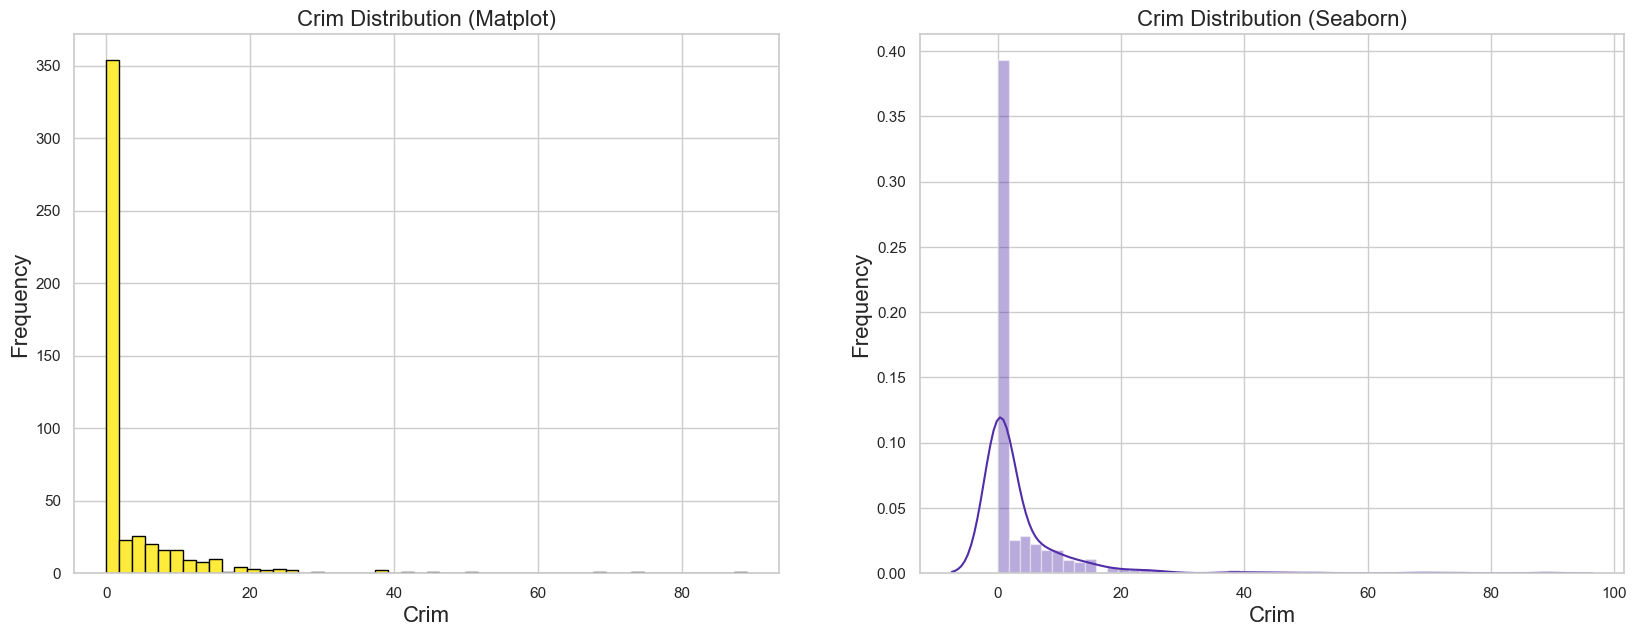

/var/folders/yw/m27cdb5d0f340xm4775qxg680000gn/T/ipykernel_26334/2830218258.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=50, color="#512DA8")


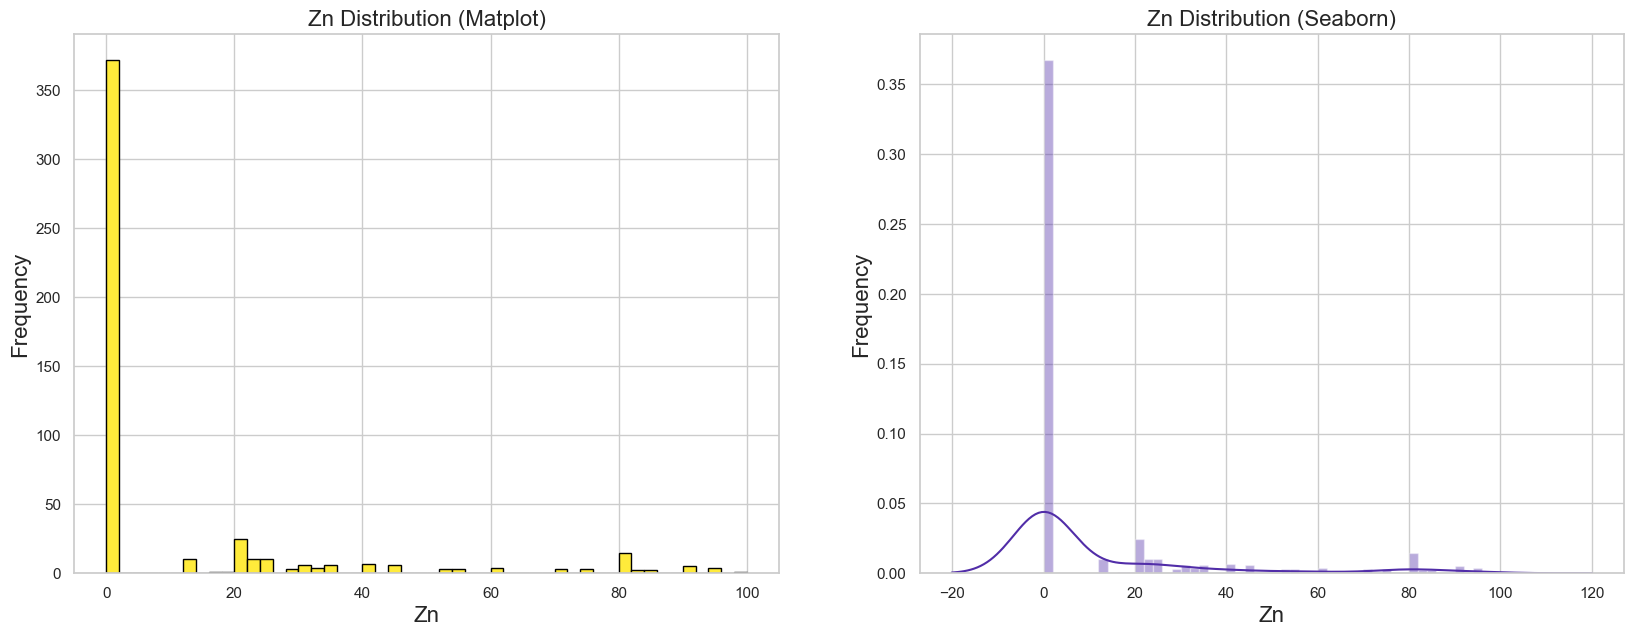

/var/folders/yw/m27cdb5d0f340xm4775qxg680000gn/T/ipykernel_26334/2830218258.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=50, color="#512DA8")


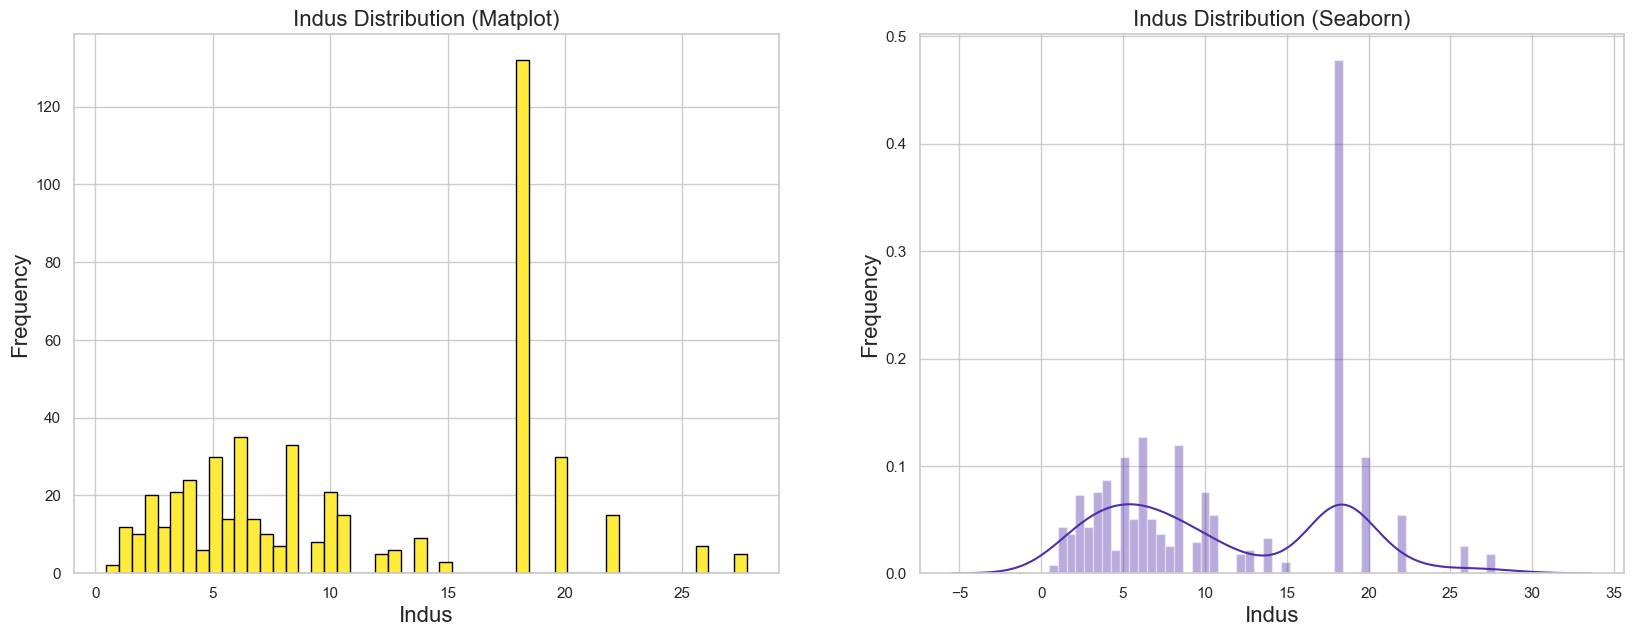

/var/folders/yw/m27cdb5d0f340xm4775qxg680000gn/T/ipykernel_26334/2830218258.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=50, color="#512DA8")


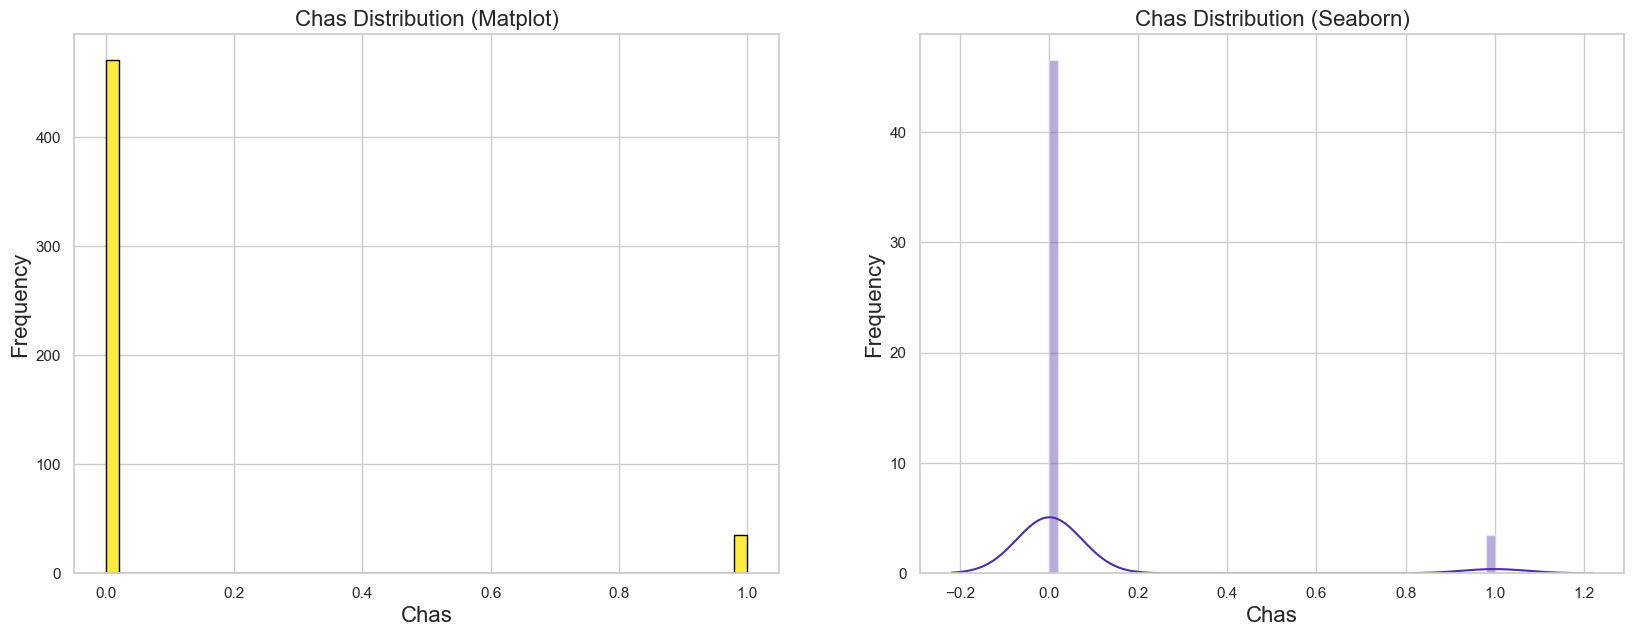

/var/folders/yw/m27cdb5d0f340xm4775qxg680000gn/T/ipykernel_26334/2830218258.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=50, color="#512DA8")


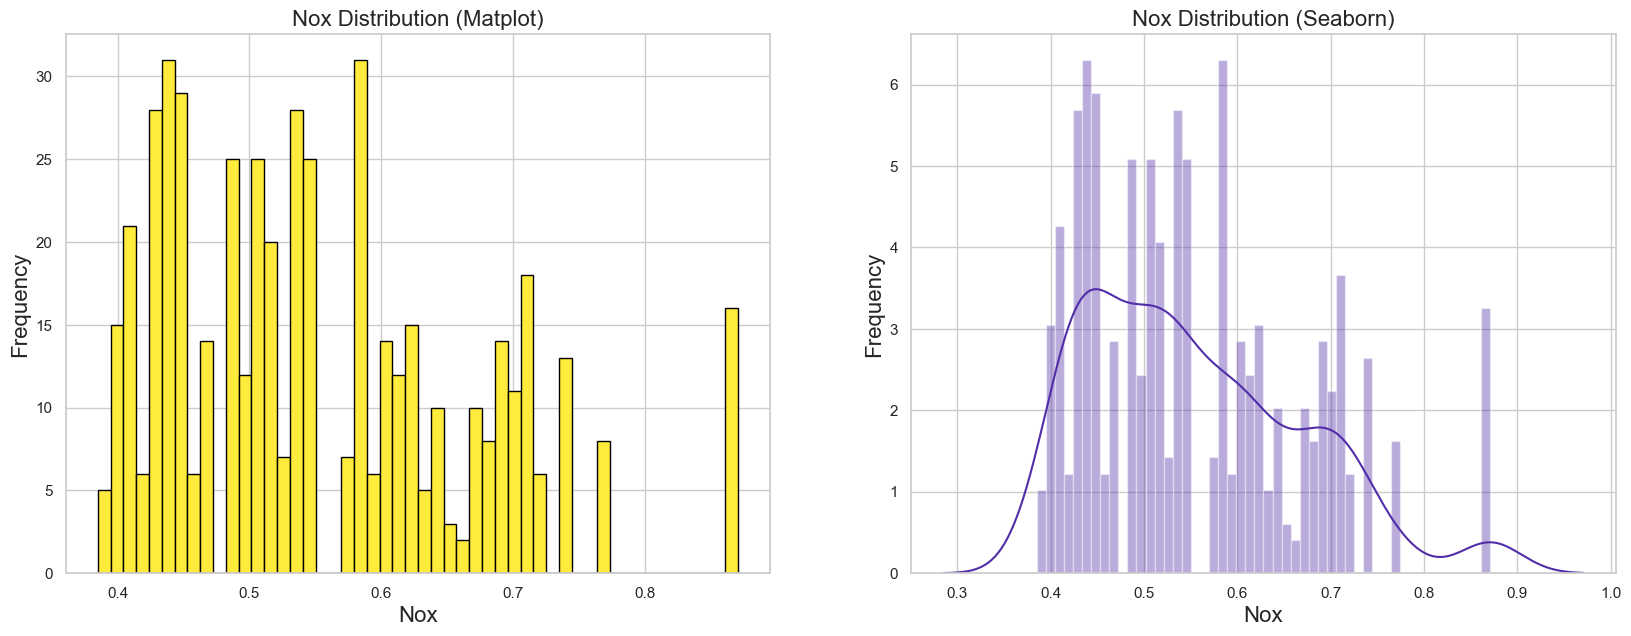

/var/folders/yw/m27cdb5d0f340xm4775qxg680000gn/T/ipykernel_26334/2830218258.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=50, color="#512DA8")


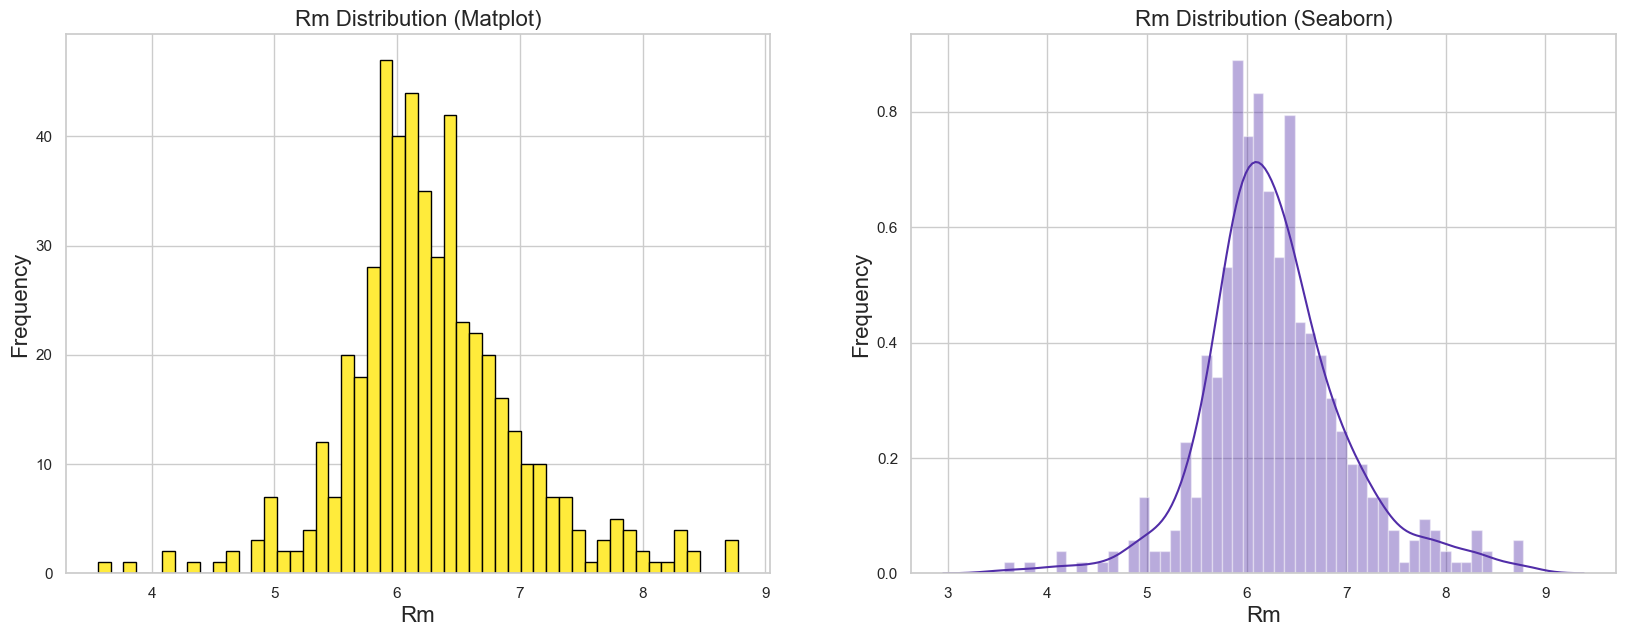

/var/folders/yw/m27cdb5d0f340xm4775qxg680000gn/T/ipykernel_26334/2830218258.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=50, color="#512DA8")


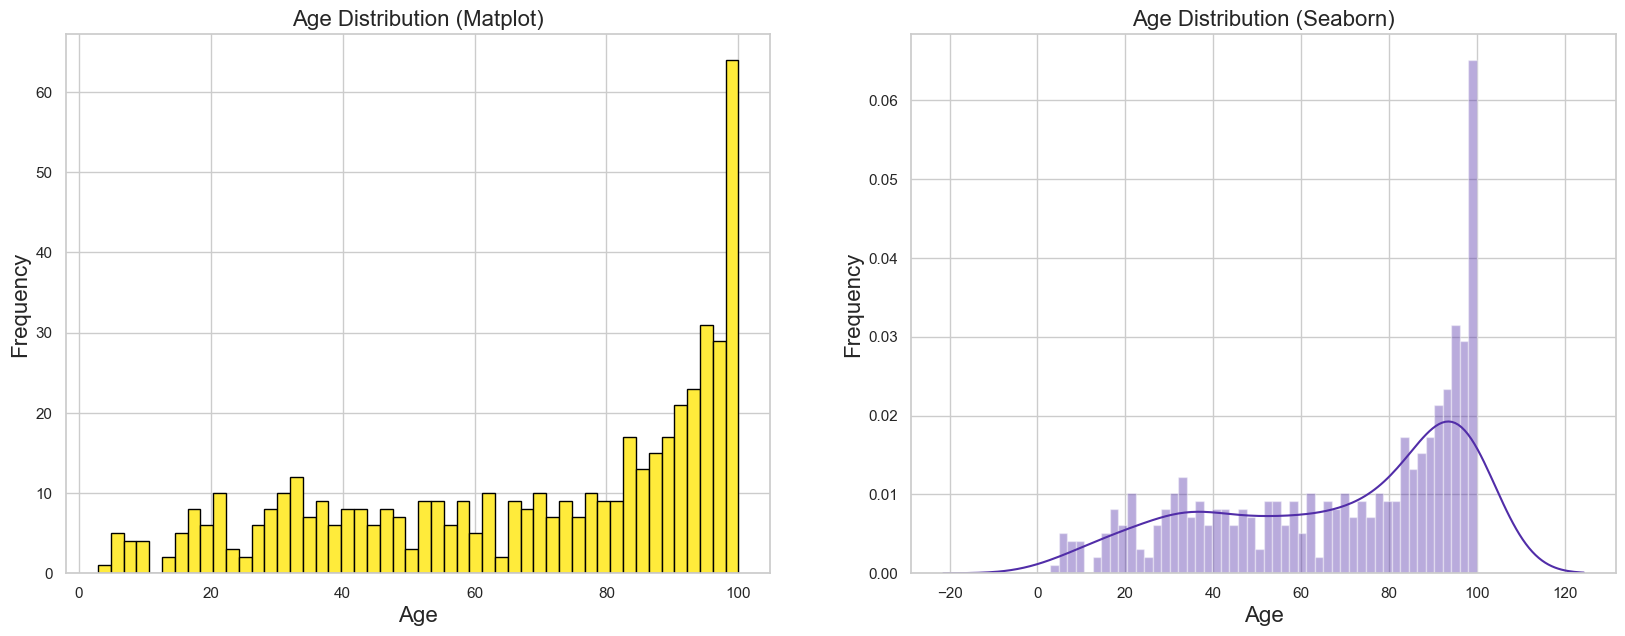

/var/folders/yw/m27cdb5d0f340xm4775qxg680000gn/T/ipykernel_26334/2830218258.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=50, color="#512DA8")


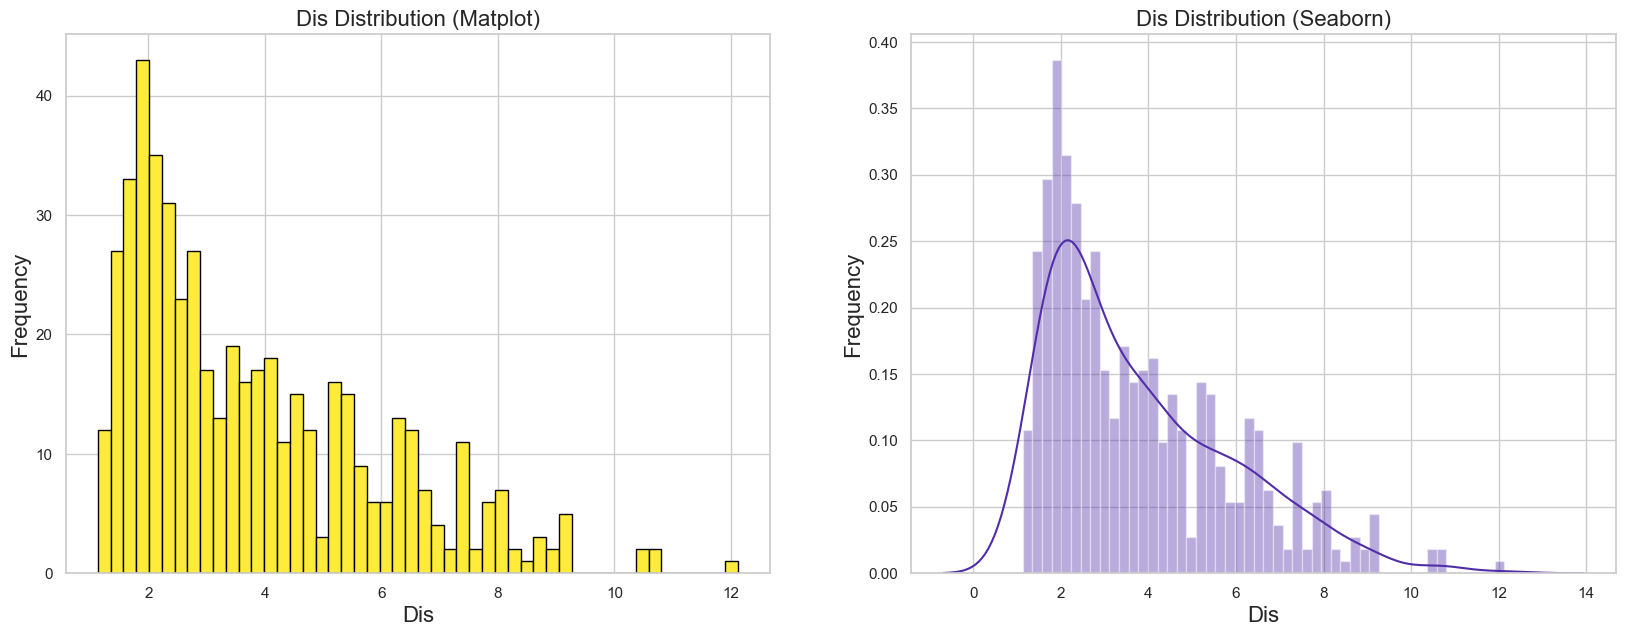

/var/folders/yw/m27cdb5d0f340xm4775qxg680000gn/T/ipykernel_26334/2830218258.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=50, color="#512DA8")


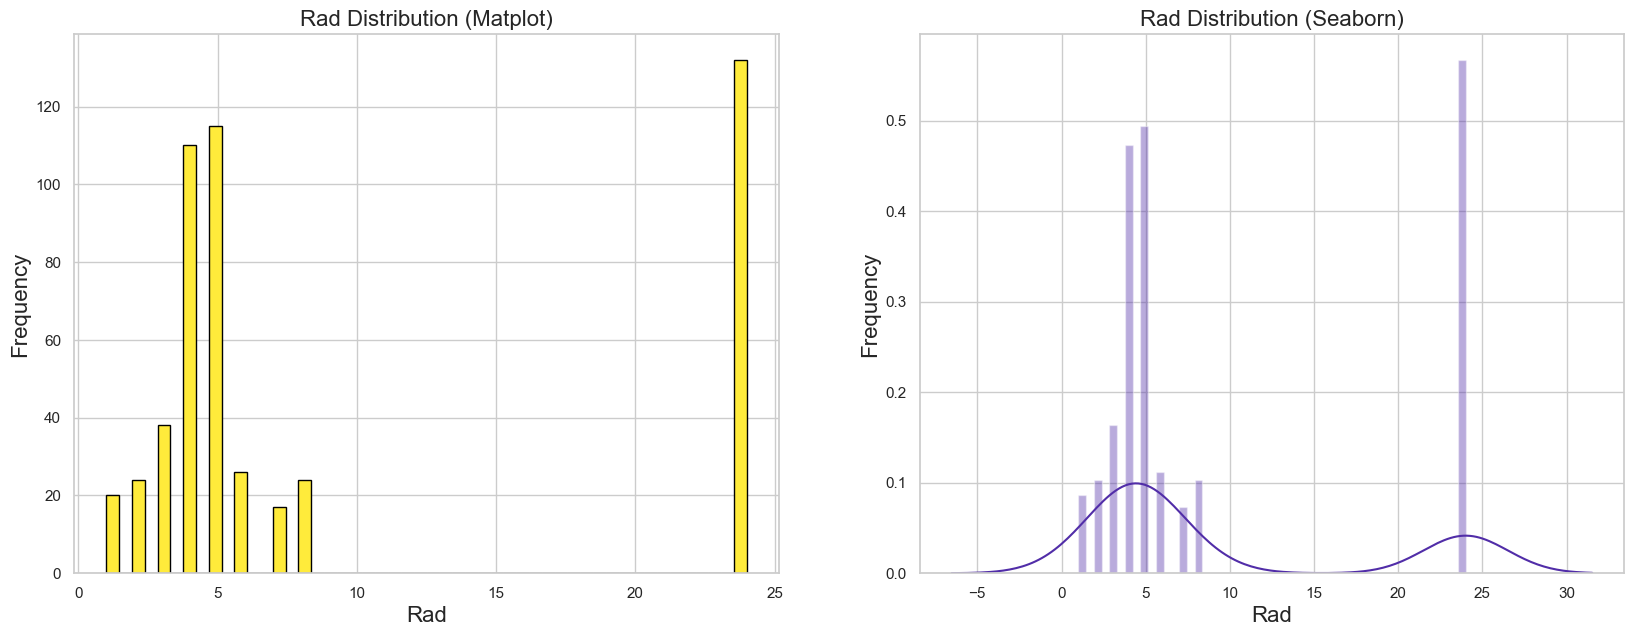

/var/folders/yw/m27cdb5d0f340xm4775qxg680000gn/T/ipykernel_26334/2830218258.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=50, color="#512DA8")


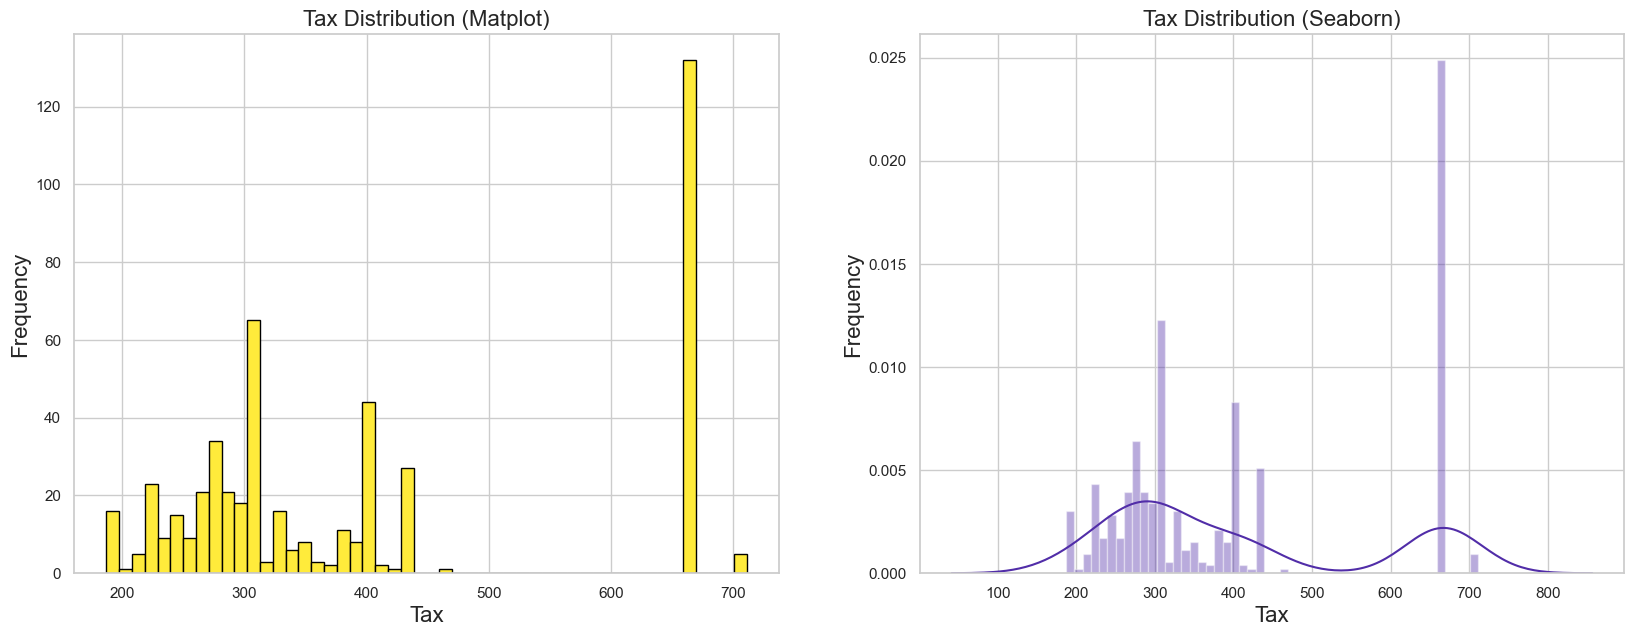

/var/folders/yw/m27cdb5d0f340xm4775qxg680000gn/T/ipykernel_26334/2830218258.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=50, color="#512DA8")


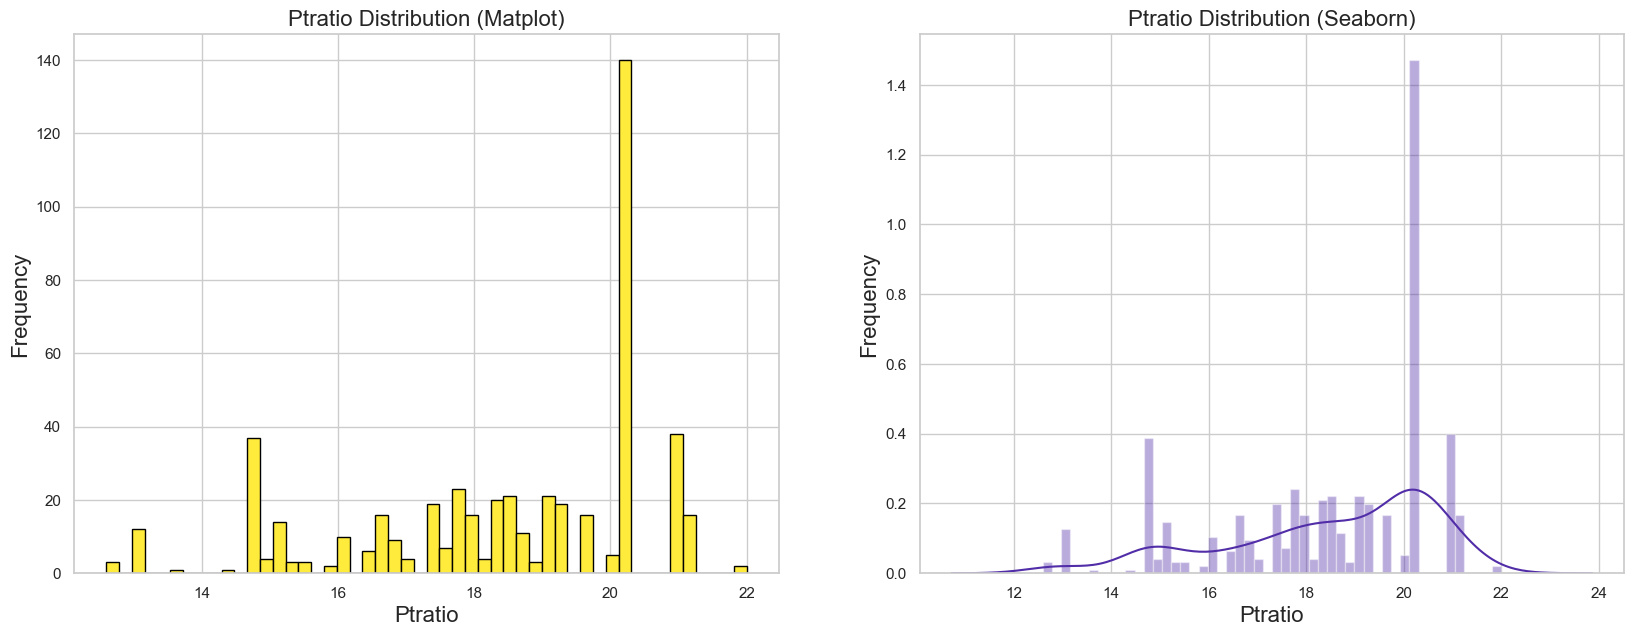

/var/folders/yw/m27cdb5d0f340xm4775qxg680000gn/T/ipykernel_26334/2830218258.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=50, color="#512DA8")


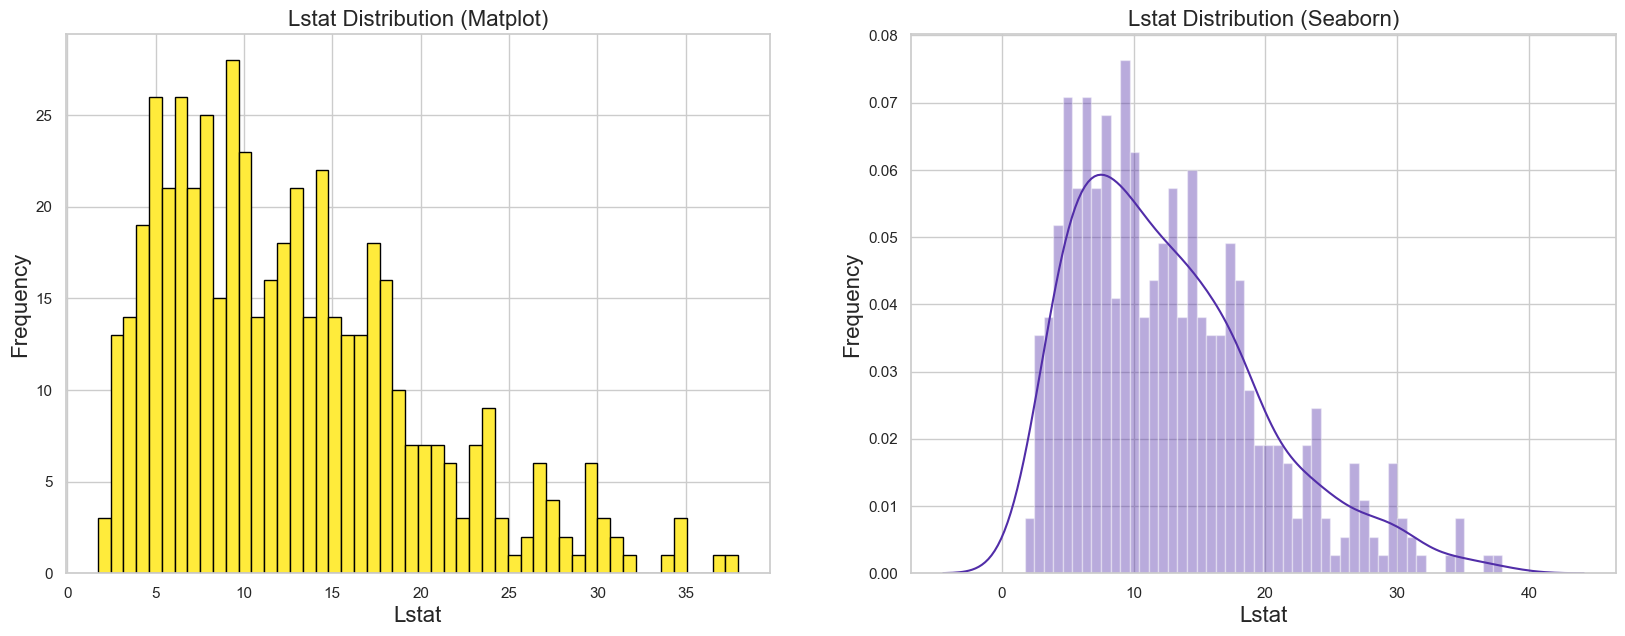

/var/folders/yw/m27cdb5d0f340xm4775qxg680000gn/T/ipykernel_26334/2830218258.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=50, color="#512DA8")


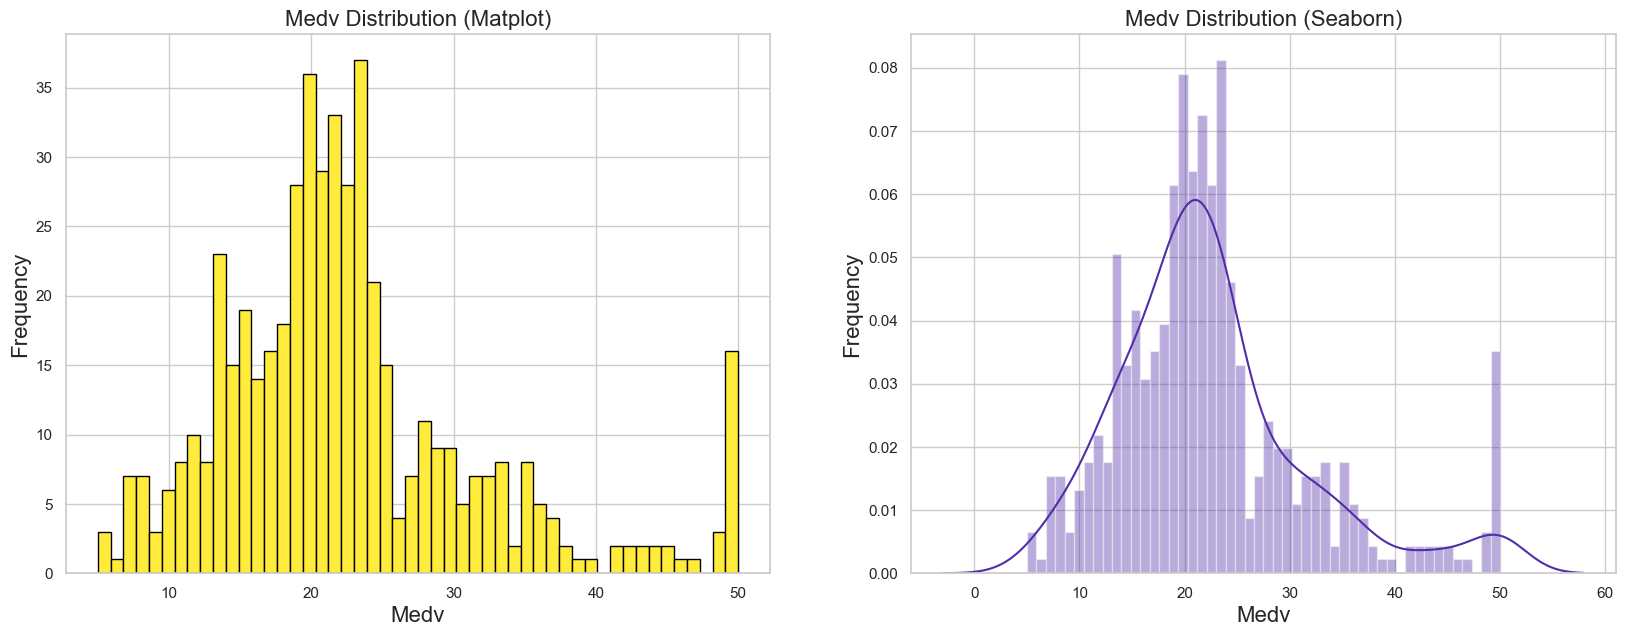

In [12]:
plot_all_numerical_columns(data)


In [13]:
corr_mat=data.corr()

In [14]:
corr_mat
type(corr_mat)

pandas.core.frame.DataFrame

<Axes: >

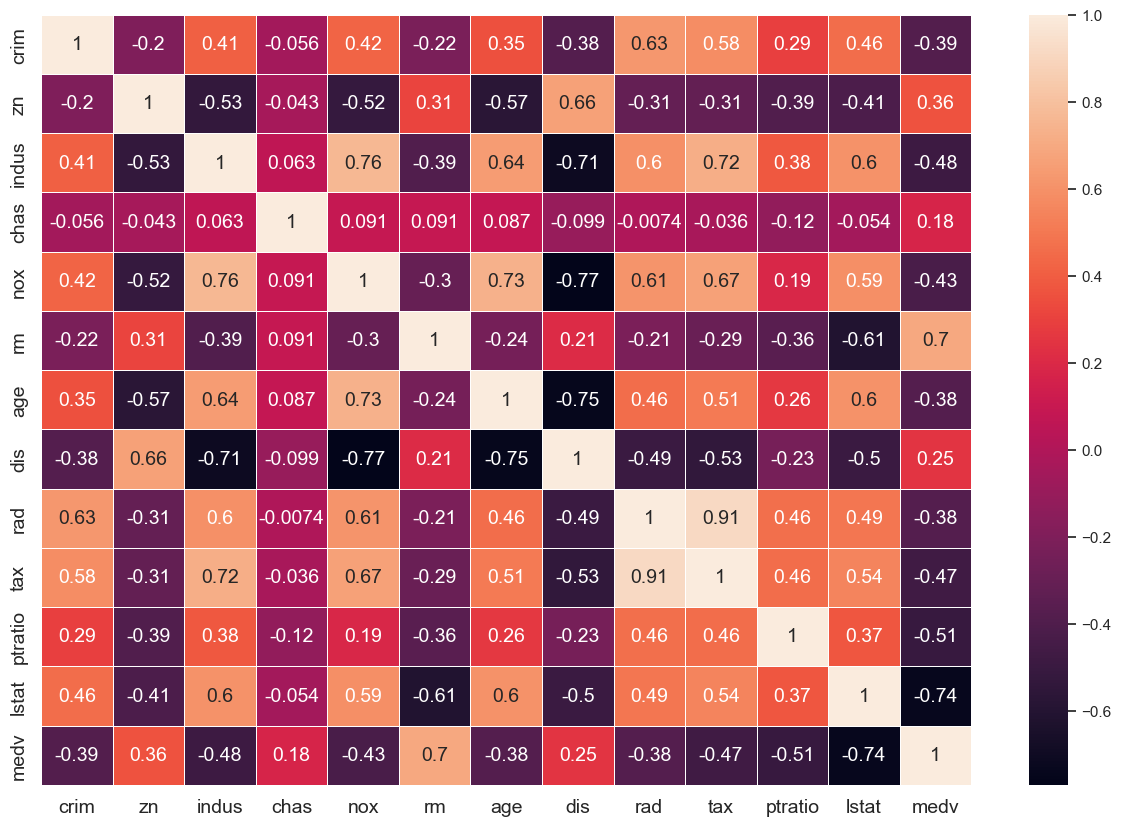

In [15]:

#creating correlation heatmap
plt.figure(figsize=(15,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(corr_mat,annot=True,annot_kws={"size":14},linewidth=.5)

In [16]:
corr_mat

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


In [17]:
correlation_matrix = corr_mat
def filter_correlation_matrix(correlation_matrix, threshold=0.65):
    # Filter the correlation matrix to include only values greater than or equal to the threshold
    filtered_matrix = correlation_matrix[(correlation_matrix >= threshold) & (correlation_matrix < 1.0)]
    return filtered_matrix

filtered_matrix = filter_correlation_matrix(correlation_matrix, threshold=0.65)

# Display the filtered correlation matrix
print("Filtered correlation matrix:")
print(filtered_matrix)


Filtered correlation matrix:
         crim        zn     indus  chas       nox       rm      age       dis  \
crim      NaN       NaN       NaN   NaN       NaN      NaN      NaN       NaN   
zn        NaN       NaN       NaN   NaN       NaN      NaN      NaN  0.664408   
indus     NaN       NaN       NaN   NaN  0.763651      NaN      NaN       NaN   
chas      NaN       NaN       NaN   NaN       NaN      NaN      NaN       NaN   
nox       NaN       NaN  0.763651   NaN       NaN      NaN  0.73147       NaN   
rm        NaN       NaN       NaN   NaN       NaN      NaN      NaN       NaN   
age       NaN       NaN       NaN   NaN  0.731470      NaN      NaN       NaN   
dis       NaN  0.664408       NaN   NaN       NaN      NaN      NaN       NaN   
rad       NaN       NaN       NaN   NaN       NaN      NaN      NaN       NaN   
tax       NaN       NaN  0.720760   NaN  0.668023      NaN      NaN       NaN   
ptratio   NaN       NaN       NaN   NaN       NaN      NaN      NaN       NaN   

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter_pairs_and_store(data, correlation_matrix, threshold=0.7):
    correlated_pairs = []  # Initialize an empty list to store the correlated pairs

    # Define a function to plot scatter plots for specific columns
    def plot_scatter(column1, column2):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=column1, y=column2, data=data, color="green", alpha=0.5)
        plt.xlabel(f"{column1.capitalize()}", fontsize=12)
        plt.ylabel(f"{column2.capitalize()}", fontsize=12)
        plt.title(f"{column1.capitalize()} vs {column2.capitalize()}", fontsize=12)
        # plt.show()

    # Iterate through the upper triangle of the correlation matrix
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            correlation = abs(correlation_matrix.iloc[i, j])
            if correlation >= threshold:  # Check if correlation exceeds the threshold
                correlated_pairs.append((data.columns[i], data.columns[j]))  # Store correlated pair
                plot_scatter(data.columns[i], data.columns[j])  # Plot scatter plot for the pair

    return correlated_pairs

Correlated pairs: [('indus', 'nox'), ('indus', 'dis'), ('indus', 'tax'), ('nox', 'age'), ('nox', 'dis'), ('age', 'dis'), ('rad', 'tax'), ('lstat', 'medv')]


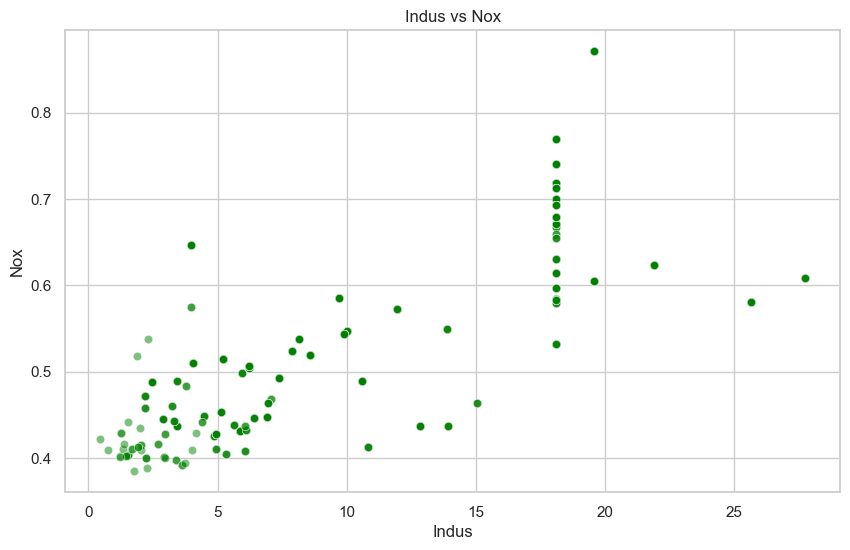

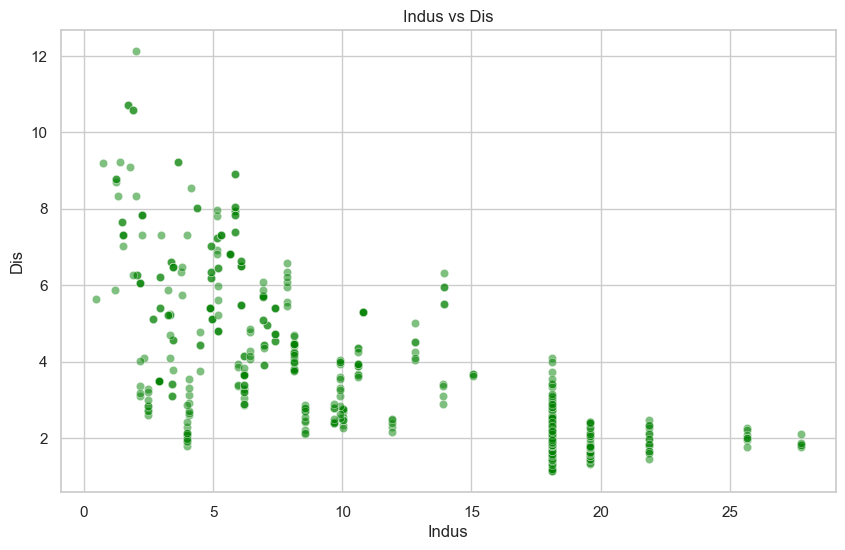

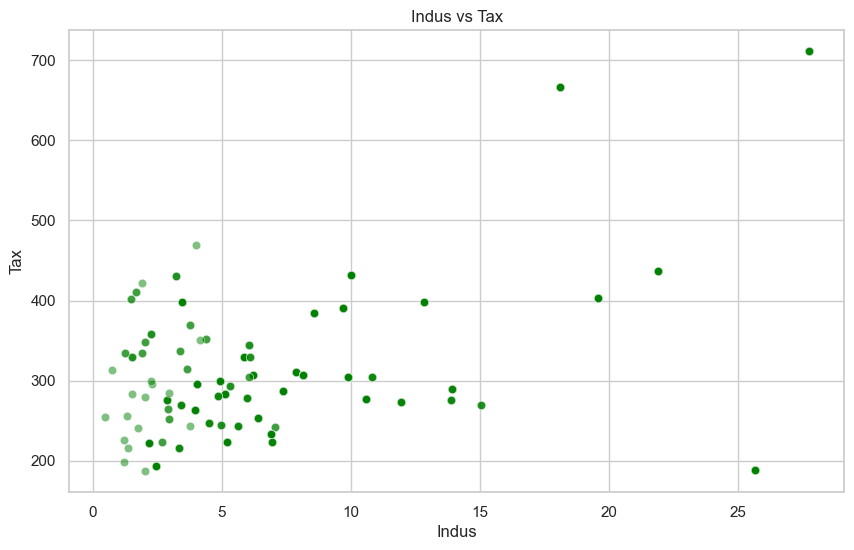

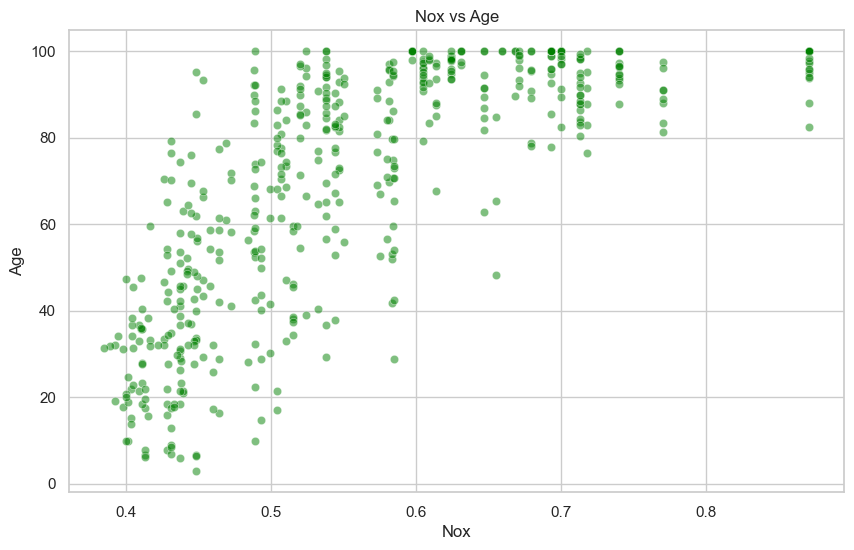

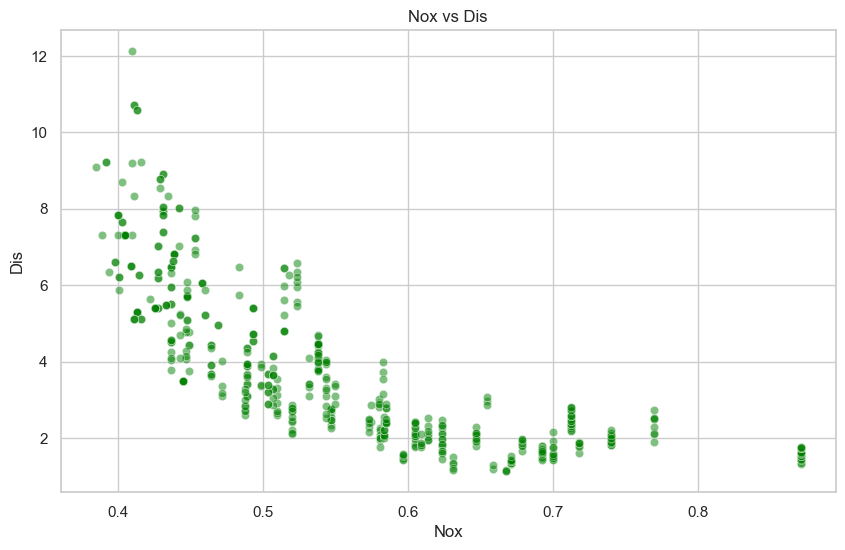

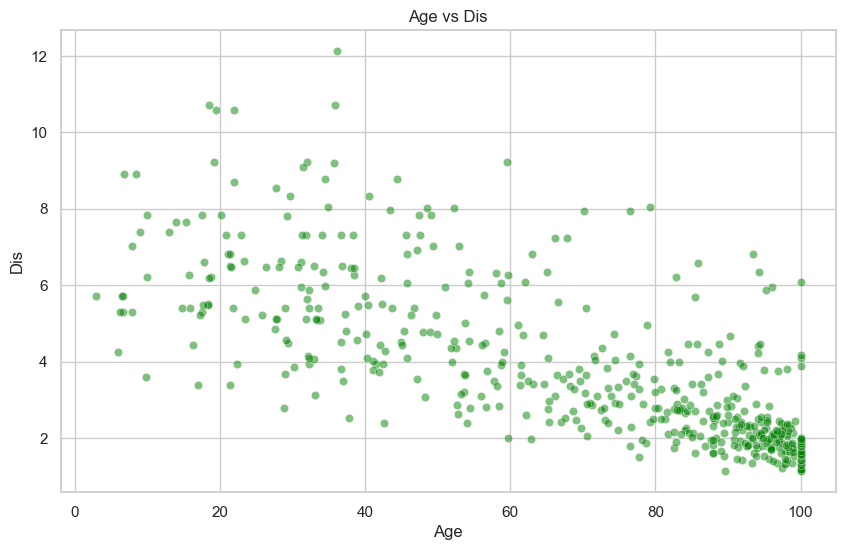

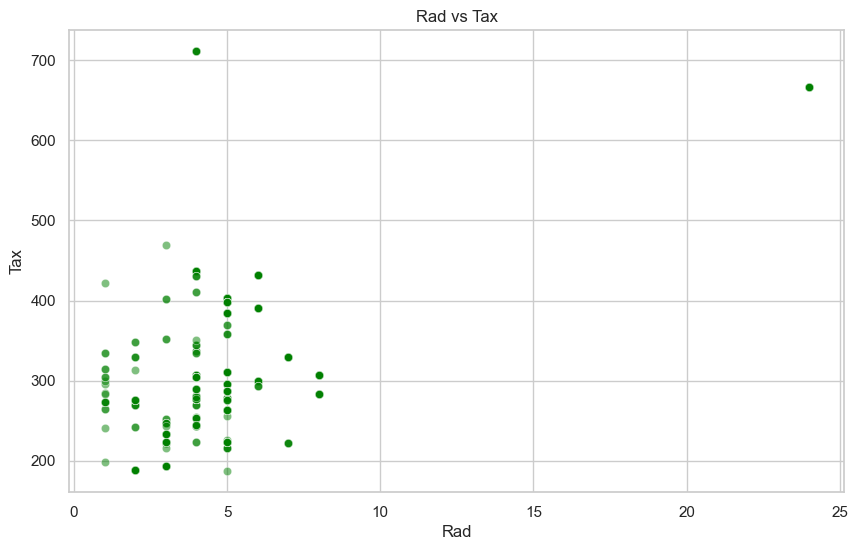

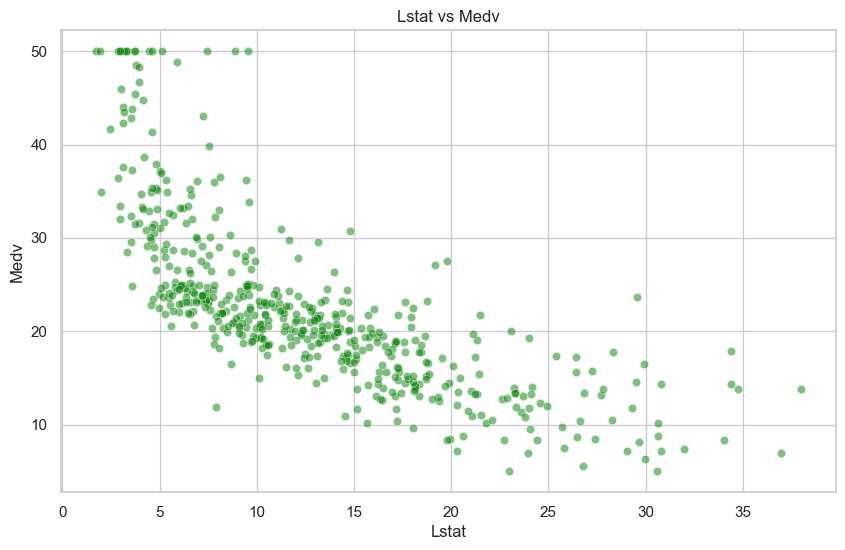

In [19]:
# Call the refactored function with your DataFrame and correlation matrix
correlated_pairs = plot_scatter_pairs_and_store(data, correlation_matrix)
print("Correlated pairs:", correlated_pairs)

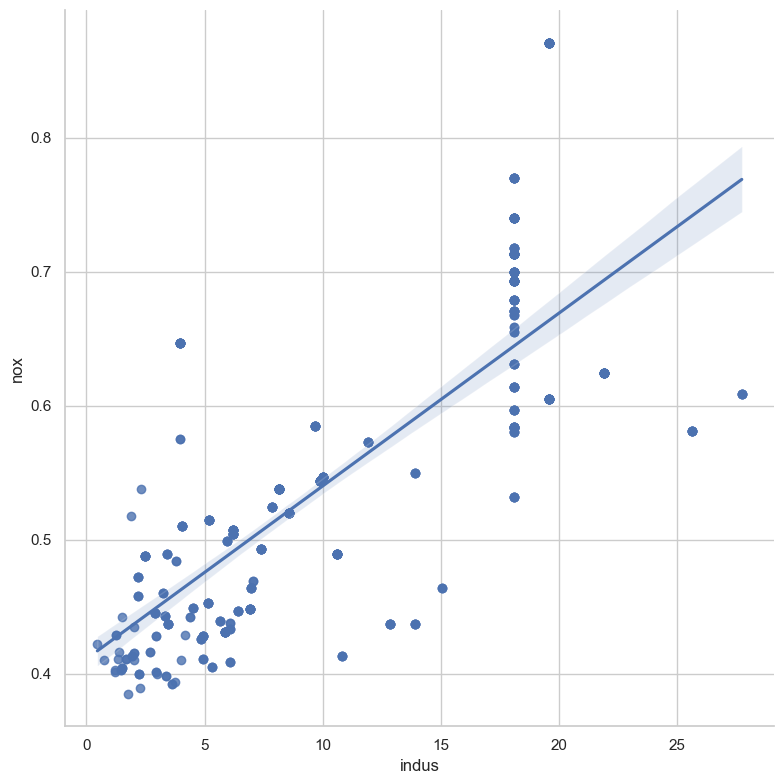

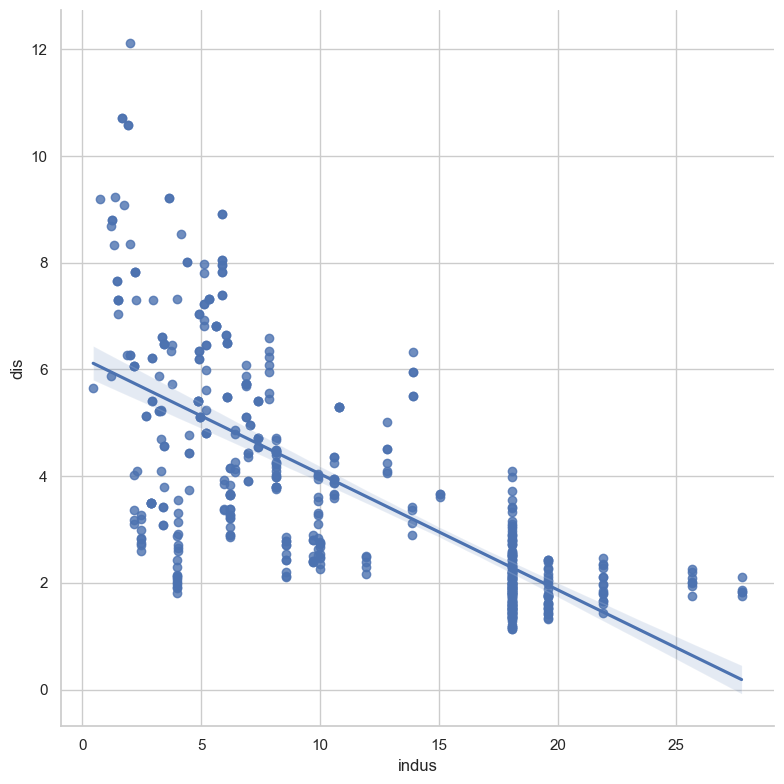

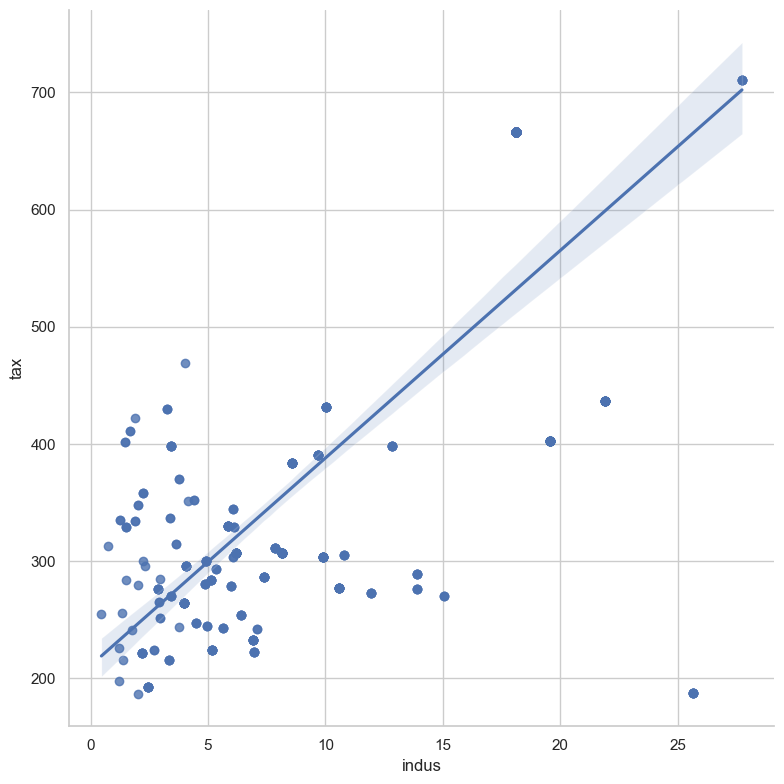

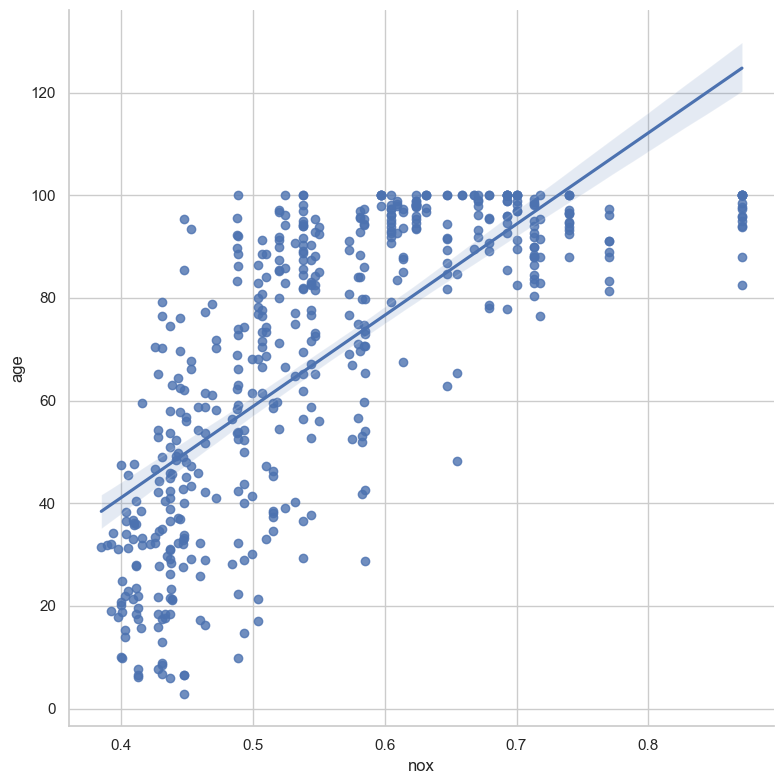

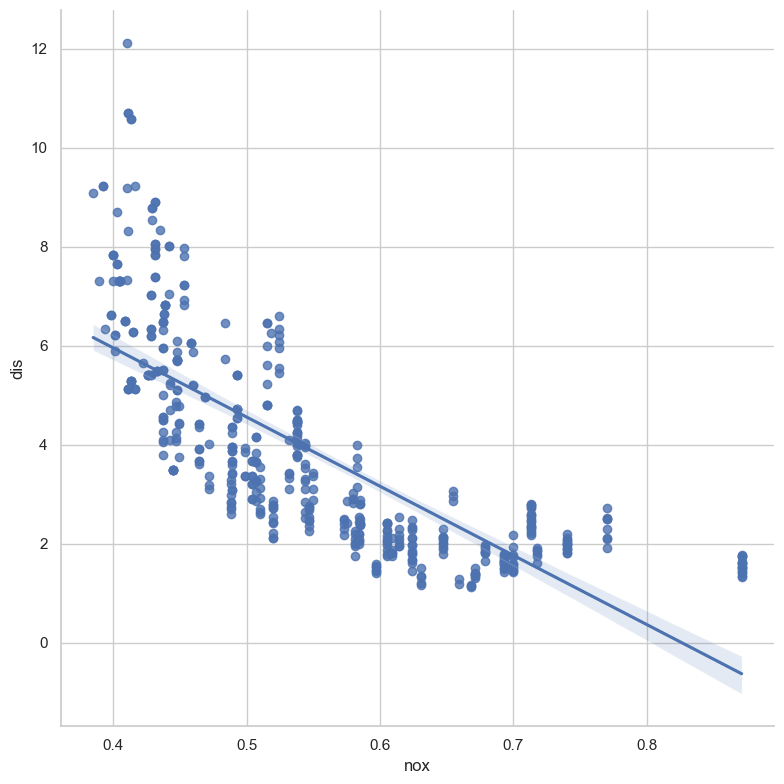

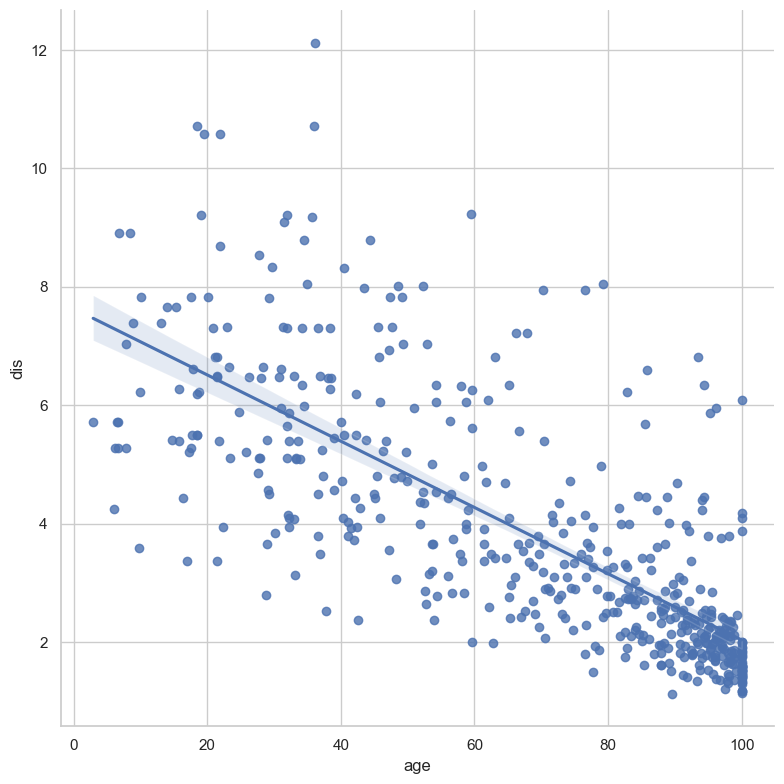

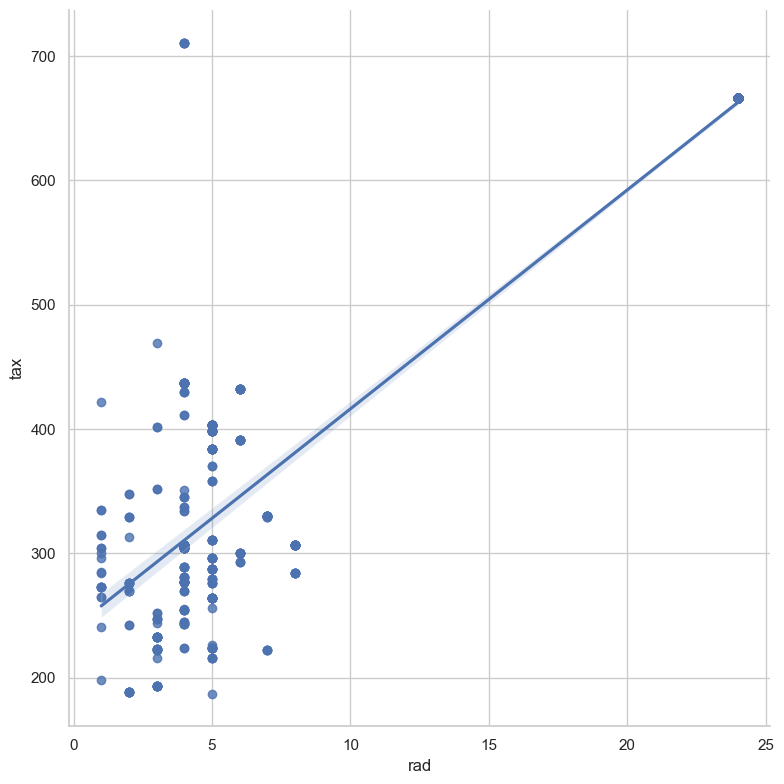

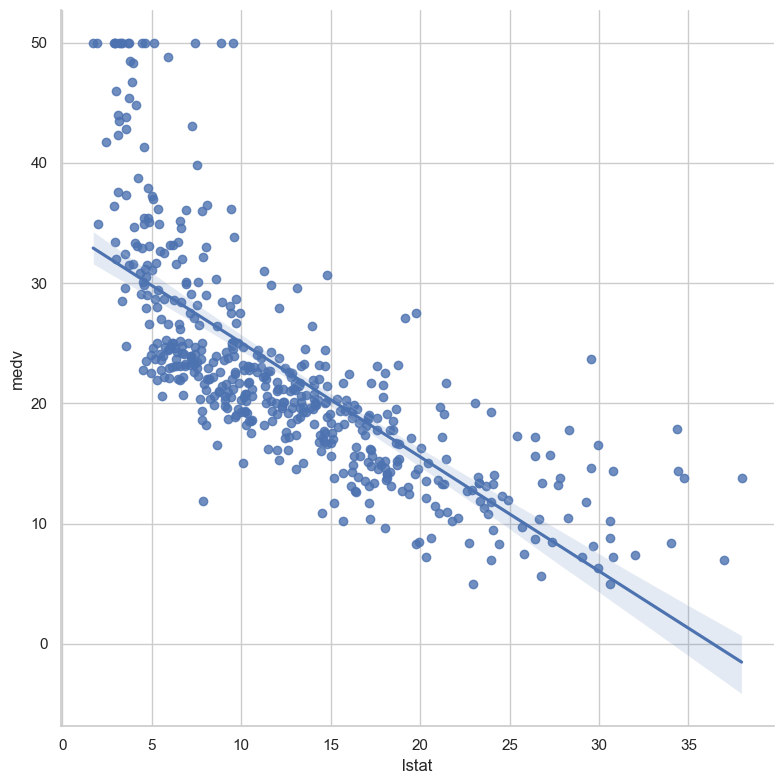

In [20]:
for i in correlated_pairs:
    column1, column2 = i
    sns.lmplot(x=column1,y=column2,data=data,height=8)
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()

# Splitting dataset into train and test data

In [21]:
# # correlated_pairs
# list = []
# for i in correlated_pairs:
#     x , y = i
#     list.append(x)
#     list.append(y)

# list
# unique_list = list(set(list))

# my_list = [1, 2, 3, 3, 4, 5, 5]
# unique_list = list(set(my_list))
# print(unique_list)
my_list = []  # Renamed the variable to my_list
for i in correlated_pairs:
    x, y = i
    my_list.append(x)  # Use my_list instead of list
    my_list.append(y)  # Use my_list instead of list

my_list


# Create an empty set to store unique elements
seen = set()

# Create a new list to store unique elements while preserving the order
unique_list = []

# Iterate through the original list
for item in my_list:
    # If the item is not in the set, add it to the set and the unique list
    if item not in seen:
        seen.add(item)
        unique_list.append(item)

print(unique_list)

['indus', 'nox', 'dis', 'tax', 'age', 'rad', 'lstat', 'medv']


In [22]:
# check list
newdf = data.loc[:, unique_list]
# print(newdf.shape)

if data.shape[0] == newdf.shape[0]:
    print("Success")
else: print("Failure")

Success


In [23]:
# Print the items with numbers
print("Choose the predictor variable by entering its corresponding number:")
for i, item in enumerate(unique_list, 1):
    print(f"{i}. {item}")

# Ask the user to input a number
while True:
    try:
        choice = int(input("Enter the number corresponding to your choice: "))
        if 1 <= choice <= len(unique_list):
            predictor_variable = unique_list[choice - 1]
            print(f"You've chosen '{predictor_variable}' as the predictor variable.")
            break
        else:
            print("Invalid number. Please enter a number within the given range.")
    except ValueError:
        print("Invalid input. Please enter a valid number.")

# Remove the selected predictor variable from the list of features
features = unique_list.copy()
features.remove(predictor_variable)

print("Predictor variable:", predictor_variable)
print("Features:", features)


Choose the predictor variable by entering its corresponding number:
1. indus
2. nox
3. dis
4. tax
5. age
6. rad
7. lstat
8. medv
You've chosen 'medv' as the predictor variable.
Predictor variable: medv
Features: ['indus', 'nox', 'dis', 'tax', 'age', 'rad', 'lstat']


In [24]:
# predictor_variable, features

In [25]:
# data.shape
predictor_df = data.loc[:, predictor_variable]
feature_df = data.loc[:, features]
# print(newdf.shape)

type(predictor_df)
predictor_df.shape

# predictor_df
# feature_df

(506,)

In [26]:
# Another Checklist 
if data.shape[0] == newdf.shape[0]:
    print("Success")
    if predictor_df.shape[0] == feature_df.shape[0]:
        print("Success")
else: print("Failure")

Success
Success


In [27]:
# Model with all
prices=data.medv
features=data.drop("medv",axis=1)

# print(features.columns)

# #tuple unpacking / dividing dataset
X_train,X_test,Y_train,Y_test=train_test_split(features,prices,train_size=0.8,random_state=10)

# -------------------------------------------------------------------------------------------------------

reg=LinearRegression()
model_1=reg.fit(X_train,Y_train)
print("Train data R squared value is :",model_1.score(X_train,Y_train))
print("Test data R squared values is :",model_1.score(X_test,Y_test))

print("Intercept :",model_1.intercept_)
slope=pd.DataFrame(model_1.coef_,index=X_train.columns,columns=["Slope"])
print(slope)

y=Y_train
x=sm.add_constant(X_train)
mod=sm.OLS(y,x)
res=mod.fit()
res.summary()

print("-------------------------------------------------------------------------------------------------------")
print(type(slope))
print(type(mod))
print(type(res))

Train data R squared value is : 0.7386111825356119
Test data R squared values is : 0.6791316286423444
Intercept : 43.41257742167013
             Slope
crim     -0.141892
zn        0.064915
indus    -0.023352
chas      2.252588
nox     -17.777791
rm        2.857717
age       0.019470
dis      -1.527674
rad       0.279946
tax      -0.012454
ptratio  -0.794522
lstat    -0.610333
-------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
<class 'statsmodels.regression.linear_model.OLS'>
<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>


In [28]:
features

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


# Checking for the Assumption of linear Regression
## Assumption of Homoscadasticity

In [29]:
#checking for the assumption of Homoscadasticity
from statsmodels.stats.diagnostic import het_goldfeldquandt 
het_goldfeldquandt(Y_train,X_train)

(1.0990004660022208, 0.2579627949777699, 'increasing')

## To interpret this output:
### Null hypothesis : no heteroscadasticity
### Alternate hypothesis : there is heteroscadasticity.
### since our p value is greater than 0.05 we reject null hypothesis there is no heteroscadasticity in the model

#### If the p-value is less than a chosen significance level (e.g., 0.05), you would reject the null hypothesis of homoscedasticity. In your case, the p-value is approximately 0.2579, which is greater than 0.05. Therefore, you may fail to reject the null hypothesis.

#### The F-statistic helps to assess the strength of evidence against the null hypothesis. A larger F-statistic suggests stronger evidence against the null hypothesis.

#### The qualitative interpretation ('increasing' in your case) indicates the direction of the detected heteroscedasticity. In your case, 'increasing' suggests that the variance of the errors increases as the values of the predictor variable increase.


In [30]:
mc=pd.Series([variance_inflation_factor(x.values, i) 
               for i in range(x.shape[1])], 
              index=x.columns)
mc=round(mc,2)
mc

const      544.12
crim         1.70
zn           2.33
indus        3.93
chas         1.07
nox          4.37
rm           1.81
age          3.32
dis          4.21
rad          7.26
tax          8.50
ptratio      1.84
lstat        2.77
dtype: float64

In [31]:
skewness = data.skew()
print(skewness)

crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
lstat      0.906460
medv       1.108098
dtype: float64


In [32]:
skewness_values = data.skew()

# Segregate skewness values into different categories
approx_symmetry = skewness_values[(skewness_values >= -0.5) & (skewness_values <= 0.5)]
slightly_skewed = skewness_values[((skewness_values >= -1) & (skewness_values < -0.5)) | ((skewness_values > 0.5) & (skewness_values <= 1))]
highly_skewed = skewness_values[(skewness_values < -1) | (skewness_values > 1)]

# Print the segregation
print("For skewness values between -0.5 and 0.5, the data exhibit approximate symmetry:")
print(approx_symmetry)

print("\nSkewness values within the range of -1 and -0.5 (negative skewed) or 0.5 and 1 (positive skewed) indicate slightly skewed data distributions:")
print(slightly_skewed)

print("\nData with skewness values less than -1 (negative skewed) or greater than 1 (positive skewed) are considered highly skewed:")
print(highly_skewed)

For skewness values between -0.5 and 0.5, the data exhibit approximate symmetry:
indus    0.295022
rm       0.403612
dtype: float64

Skewness values within the range of -1 and -0.5 (negative skewed) or 0.5 and 1 (positive skewed) indicate slightly skewed data distributions:
nox        0.729308
age       -0.598963
tax        0.669956
ptratio   -0.802325
lstat      0.906460
dtype: float64

Data with skewness values less than -1 (negative skewed) or greater than 1 (positive skewed) are considered highly skewed:
crim    5.223149
zn      2.225666
chas    3.405904
dis     1.011781
rad     1.004815
medv    1.108098
dtype: float64


In [34]:
import numpy as np

# Assuming 'age' is the column you want to transform
# data['log_age'] = np.log(data['age'])

# Check the skewness after transformation
log_skewness = np.log(data['age']).skew()
print("Skewness after logarithmic transformation:", log_skewness)


Skewness after logarithmic transformation: -1.6756550438247213


In [35]:
# Assuming 'age' is the column you want to transform
# data['sqrt_age'] = np.sqrt(data['age'])

# Check the skewness after transformation
sqrt_skewness = np.sqrt(data['age']).skew()
print("Skewness after square root transformation:", sqrt_skewness)
print(type(sqrt_skewness))


Skewness after square root transformation: -0.9774659289270576
<class 'numpy.float64'>


In [36]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [37]:
from scipy.stats import boxcox

# Assuming 'age' is the column you want to transform
transformed_age, lambda_value = boxcox(data['age'])
data['box_cox_age'] = np.sqrt(data['age'])
# Check the skewness after transformation
bc_skewness = pd.Series(transformed_age).skew()
print("Skewness after Box-Cox transformation:", bc_skewness)
print("Lambda value:", lambda_value)


Skewness after Box-Cox transformation: -0.4251406231041932
Lambda value: 1.3414473519532712


In [38]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,box_cox_age
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,8.074652
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,8.882567
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,7.816649
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,6.767570
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,7.362065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,8.312641
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,8.757854
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,9.539392
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,9.449868


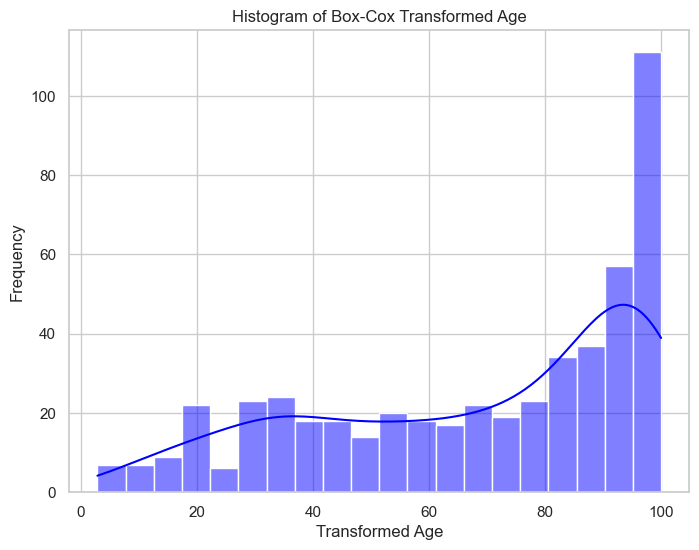

In [41]:

plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True, color='blue', bins=20)
plt.title('Histogram of Box-Cox Transformed Age')
plt.xlabel('Transformed Age')
plt.ylabel('Frequency')
plt.show()

/var/folders/yw/m27cdb5d0f340xm4775qxg680000gn/T/ipykernel_26334/1567236808.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"])


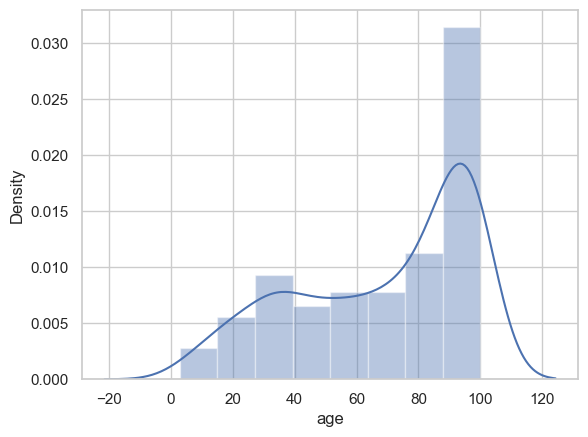

In [44]:
sns.distplot(data["age"])
plt.show()


/var/folders/yw/m27cdb5d0f340xm4775qxg680000gn/T/ipykernel_26334/1562710748.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["box_cox_age"])


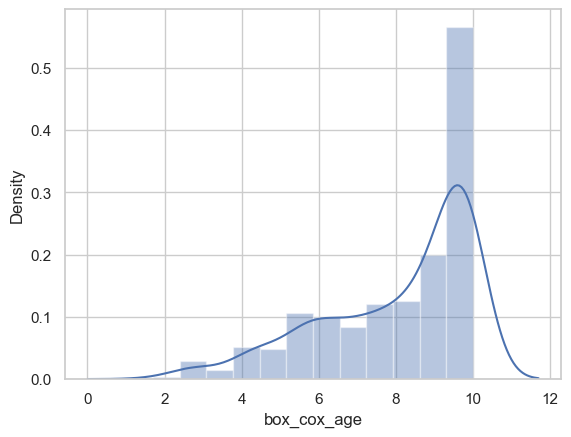

In [43]:
sns.distplot(data["box_cox_age"])
plt.show()

In [45]:
import numpy as np
from scipy.stats import boxcox

def choose_best_transformation(data, column_name):
    # Original skewness
    original_skewness = data[column_name].skew()
    print("Original skewness:", original_skewness)
    
    # Logarithmic transformation
    log_transformed = np.log(data[column_name])
    log_skewness = log_transformed.skew()
    print("Skewness after logarithmic transformation:", log_skewness)
    
    # Square root transformation
    sqrt_transformed = np.sqrt(data[column_name])
    sqrt_skewness = sqrt_transformed.skew()
    print("Skewness after square root transformation:", sqrt_skewness)
    
    # Box-Cox transformation
    boxcox_transformed, lambda_value = boxcox(data[column_name])
    boxcox_skewness = pd.Series(boxcox_transformed).skew()
    print("Skewness after Box-Cox transformation:", boxcox_skewness)
    print("Lambda value:", lambda_value)
    
    # Compare skewness values and choose the best transformation
    transformations = {'logarithmic': log_skewness, 'square_root': sqrt_skewness, 'box_cox': boxcox_skewness}
    best_transformation = min(transformations, key=transformations.get)
    print("Best transformation:", best_transformation)
    
    # Add the best transformation to the main DataFrame
    if best_transformation == 'logarithmic':
        data['log_' + column_name] = log_transformed
    elif best_transformation == 'square_root':
        data['sqrt_' + column_name] = sqrt_transformed
    else:
        data['boxcox_' + column_name] = boxcox_transformed
        
    return data

# Example usage:
# Assuming 'data' is your main DataFrame and 'column_name' is the column you want to transform
# Replace 'column_name' with the actual column name from your DataFrame



In [46]:
data = choose_best_transformation(data, 'age')

Original skewness: -0.5989626398812962
Skewness after logarithmic transformation: -1.6756550438247213
Skewness after square root transformation: -0.9774659289270576
Skewness after Box-Cox transformation: -0.4251406231041932
Lambda value: 1.3414473519532712
Best transformation: logarithmic


In [47]:
import numpy as np
from scipy.stats import boxcox

def choose_best_transformation(data, column_name):
    # Original skewness
    original_skewness = data[column_name].skew()
    print("Original skewness:", original_skewness)
    
    # Logarithmic transformation
    log_transformed = np.log(data[column_name])
    log_skewness = log_transformed.skew()
    print("Skewness after logarithmic transformation:", log_skewness)
    
    # Square root transformation
    sqrt_transformed = np.sqrt(data[column_name])
    sqrt_skewness = sqrt_transformed.skew()
    print("Skewness after square root transformation:", sqrt_skewness)
    
    # Box-Cox transformation
    boxcox_transformed, lambda_value = boxcox(data[column_name])
    boxcox_skewness = pd.Series(boxcox_transformed).skew()
    print("Skewness after Box-Cox transformation:", boxcox_skewness)
    print("Lambda value:", lambda_value)
    
    # Compare skewness values and choose the best transformation
    transformations = {'logarithmic': log_skewness, 'square_root': sqrt_skewness, 'box_cox': boxcox_skewness}
    best_transformation = min(transformations, key=transformations.get)
    print("Best transformation:", best_transformation)
    
    # Add the best transformation to the main DataFrame
    if best_transformation == 'logarithmic':
        data['log_' + column_name] = log_transformed
    elif best_transformation == 'square_root':
        data['sqrt_' + column_name] = sqrt_transformed
    else:
        data['boxcox_' + column_name] = boxcox_transformed
        
    return data

# Example usage:
# Assuming 'data' is your main DataFrame and 'column_name' is the column you want to transform
# Replace 'column_name' with the actual column name from your DataFrame
data = choose_best_transformation(data, 'age')


Original skewness: -0.5989626398812962
Skewness after logarithmic transformation: -1.6756550438247213
Skewness after square root transformation: -0.9774659289270576
Skewness after Box-Cox transformation: -0.4251406231041932
Lambda value: 1.3414473519532712
Best transformation: logarithmic


In [48]:
data.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,log_age,sqrt_age,box_cox_age
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,4.177459,8.074652,8.074652
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,4.368181,8.882567,8.882567
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,4.112512,7.816649,7.816649
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,3.824284,6.767570,6.767570
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,3.992681,7.362065,7.362065


In [49]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,log_age,sqrt_age,box_cox_age
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,4.177459,8.074652,8.074652
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,4.368181,8.882567,8.882567
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,4.112512,7.816649,7.816649
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,3.824284,6.767570,6.767570
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,3.992681,7.362065,7.362065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,4.235555,8.312641,8.312641
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,4.339902,8.757854,8.757854
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,4.510860,9.539392,9.539392
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,4.492001,9.449868,9.449868


In [50]:
import numpy as np
from scipy.stats import boxcox

def choose_best_transformation(data, column_name):
    # Original skewness
    original_skewness = data[column_name].skew()
    print("Original skewness:", original_skewness)
    
    # Logarithmic transformation
    log_transformed = np.log(data[column_name])
    log_skewness = log_transformed.skew()
    print("Skewness after logarithmic transformation:", log_skewness)
    
    # Square root transformation
    sqrt_transformed = np.sqrt(data[column_name])
    sqrt_skewness = sqrt_transformed.skew()
    print("Skewness after square root transformation:", sqrt_skewness)
    
    # Box-Cox transformation
    # Box-Cox transformation cannot handle negative values
    if (data[column_name] <= 0).any():
        boxcox_skewness = float('inf')  # Set to infinity if negative values are present
    else:
        boxcox_transformed, lambda_value = boxcox(data[column_name])
        boxcox_skewness = pd.Series(boxcox_transformed).skew()
    print("Skewness after Box-Cox transformation:", boxcox_skewness)
    if boxcox_skewness != float('inf'):
        print("Lambda value:", lambda_value)
    
    # Compare skewness values and choose the best transformation
    abs_original_skewness = abs(original_skewness)
    abs_log_skewness = abs(log_skewness)
    abs_sqrt_skewness = abs(sqrt_skewness)
    abs_boxcox_skewness = abs(boxcox_skewness)
    
    transformations = {
        'logarithmic': abs_log_skewness,
        'square_root': abs_sqrt_skewness,
        'box_cox': abs_boxcox_skewness
    }
    best_transformation = min(transformations, key=transformations.get)
    print("Best transformation:", best_transformation)
    
    # Add the best transformation to the main DataFrame
    if best_transformation == 'logarithmic':
        data['log_' + column_name] = log_transformed
    elif best_transformation == 'square_root':
        data['sqrt_' + column_name] = sqrt_transformed
    elif best_transformation == 'box_cox':
        if boxcox_skewness != float('inf'):
            data['boxcox_' + column_name] = boxcox_transformed
        
    return data

# Example usage:
# Assuming 'data' is your main DataFrame and 'column_name' is the column you want to transform
# Replace 'column_name' with the actual column name from your DataFrame
data = choose_best_transformation(data, 'age')


Original skewness: -0.5989626398812962
Skewness after logarithmic transformation: -1.6756550438247213
Skewness after square root transformation: -0.9774659289270576
Skewness after Box-Cox transformation: -0.4251406231041932
Lambda value: 1.3414473519532712
Best transformation: box_cox


In [51]:
# data = data.drop("boxcox_age",axis=1)
data.head(4)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,log_age,sqrt_age,box_cox_age,boxcox_age
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,4.177459,8.074652,8.074652,201.623543
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,4.368181,8.882567,8.882567,260.624267
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,4.112512,7.816649,7.816649,184.738608
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,3.824284,6.767570,6.767570,125.260171


In [52]:
def choose_best_transformation(data, column_name):
    # Original skewness
    original_skewness = data[column_name].skew()
    print("Original skewness:", original_skewness)
    
    # Logarithmic transformation
    log_transformed = np.log(data[column_name])
    log_skewness = log_transformed.skew()
    print("Skewness after logarithmic transformation:", log_skewness)
    
    # Square root transformation
    sqrt_transformed = np.sqrt(data[column_name])
    sqrt_skewness = sqrt_transformed.skew()
    print("Skewness after square root transformation:", sqrt_skewness)
    
    # Box-Cox transformation
    # Box-Cox transformation cannot handle negative values
    if (data[column_name] <= 0).any():
        boxcox_skewness = float('inf')  # Set to infinity if negative values are present
    else:
        boxcox_transformed, lambda_value = boxcox(data[column_name])
        boxcox_skewness = pd.Series(boxcox_transformed).skew()
    print("Skewness after Box-Cox transformation:", boxcox_skewness)
    if boxcox_skewness != float('inf'):
        print("Lambda value:", lambda_value)
    
    # Compare skewness values and choose the best transformation
    abs_original_skewness = abs(original_skewness)
    abs_log_skewness = abs(log_skewness)
    abs_sqrt_skewness = abs(sqrt_skewness)
    abs_boxcox_skewness = abs(boxcox_skewness)
    
    transformations = {
        'logarithmic': abs_log_skewness,
        'square_root': abs_sqrt_skewness,
        'box_cox': abs_boxcox_skewness
    }
    best_transformation = min(transformations, key=transformations.get)
    print("Best transformation:", best_transformation)
    
    # Add the best transformation to the main DataFrame
    if best_transformation == 'logarithmic':
        data['log_' + column_name] = np.log(data['age'])
    elif best_transformation == 'square_root':
        data['sqrt_' + column_name] = np.sqrt(data['age'])
    elif best_transformation == 'box_cox':
        data['box_cox_' + column_name] = np.sqrt(data['age'])

        
    return data

# Example usage:
# Assuming 'data' is your main DataFrame and 'column_name' is the column you want to transform
# Replace 'column_name' with the actual column name from your DataFrame
data = choose_best_transformation(data, 'age')


Original skewness: -0.5989626398812962
Skewness after logarithmic transformation: -1.6756550438247213
Skewness after square root transformation: -0.9774659289270576
Skewness after Box-Cox transformation: -0.4251406231041932
Lambda value: 1.3414473519532712
Best transformation: box_cox


In [53]:
data.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,log_age,sqrt_age,box_cox_age,boxcox_age
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,4.177459,8.074652,8.074652,201.623543
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,4.368181,8.882567,8.882567,260.624267
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,4.112512,7.816649,7.816649,184.738608
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,3.824284,6.767570,6.767570,125.260171
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,3.992681,7.362065,7.362065,157.195622
